# Titanic - Machine Learning from Disaster 
## Mi primer experiencia compitiendo en Kaggle

![title](https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg)

### Data Dictionary

|Variable |Definition                                                         |Key                      |
|---------|-------------------------------------------------------------------|-------------------------|
|survival |Survival                                                           |0 = No, 1 = Yes          |
|pclass   |Ticket class                                                       |1 = 1st, 2 = 2nd, 3 = 3rd|
|sex      |Sex                                                                |                         | 
|Age      |Age in years                                                       |                         |
|sibsp    |# of siblings / spouses aboard the Titanic                         |                         |
|parch    |# of parents / children aboard the Titanic                         |                         | 	
|ticket   |Ticket number                                                      |                         |
|fare     |Passenger fare                                                     |                         |
|cabin    |Cabin number                                                       |	                        |
|embarked |Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|                         |

# Librerías a utilizar

In [116]:
#Importamos las librerías a utilizar:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

# Importación de los datos

In [117]:
#Importamos los archivos 'test' y 'train'
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

# Comprensión de los datos

In [118]:
#Verificamos la cantidad de datos que hay en el conjunto:
print(df_train.shape)
print(df_test.shape)
df_train.tail(10)

(891, 12)
(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [119]:
#Verificamos el tipo de datos del conjunto:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [120]:
#Verificamos si hay datos faltantes:
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [121]:
#Verificamos las estadísticas del conjunto:
print(df_train.describe())
print(df_test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

# Pre-procesamiento de los datos

In [122]:
#Cambiamos los datos de sexos en números
df_train['Sex'].replace(['female','male'],[0,1],inplace=True)
df_test['Sex'].replace(['female','male'],[0,1],inplace=True)

In [123]:
#Cambiamos los datos de embarque en números
df_train['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)
df_test['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

#Reemplazamos los datos faltantes en la edad por la media de esta columna
df_train['Age'] = df_train['Age'].replace(np.nan, 30) #Mean = 30
df_test['Age'] = df_test['Age'].replace(np.nan, 30)
print(df_test.head())
print(df_train.head())

#Creamos varios grupos de acuerdo a bandas de las edades
#Bandas: 0-8, 9-15, 16-18, 19-25, 26-40, 41-60, 61-100
bins = [0, 8, 15, 18, 25, 40, 60, 100]
names = ['1', '2', '3', '4', '5', '6', '7']
df_train['Age'] = pd.cut(df_train['Age'], bins, labels = names)
df_test['Age'] = pd.cut(df_test['Age'], bins, labels = names)

#Eliminamos la columna de "Cabin" ya que tiene muchos datos perdidos
df_train.drop(['Cabin'], axis = 1, inplace=True)
df_test.drop(['Cabin'], axis = 1, inplace=True)

In [124]:
#Eliminamos las columnas que considero que no son necesarias para el analisis
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df_test = df_test.drop(['Name','Ticket', 'Cabin'], axis=1)

In [125]:
#Completamos las filas con datos NaN
df_train = df_train.fillna(method = 'ffill', axis = 0)
df_test = df_test.fillna(method = 'ffill', axis = 0)

In [126]:
#Verificamos los datos
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())
print(df_train.shape)
print(df_test.shape)
print(df_train.head(10))
print(df_test.head(10))

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(891, 8)
(418, 8)
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500       1.0
1         1       1    0  38.0      1      0  71.2833       2.0
2         1       3    0  26.0      0      0   7.9250       1.0
3         1       1    0  35.0      1      0  53.1000       1.0
4         0       3    1  35.0      0      0   8.0500       1.0
5         0       3    1  35.0      0      0   8.4583       0.0
6         0       1    1  54.0      0      0  51.8625       1.0
7         0       3    1   2.0      3      1  21.0750       1.0
8         1       3    0  27.0      0      2  11.1333       1.0
9         1       2    0  14.0      1      0  30.0708       2.0
   P

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.065571 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.291157  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.058415 -0.114631 -0.245489   
Age      -0.065571 -0.291157  0.058415  1.000000 -0.206104 -0.165191   
SibSp    -0.035322  0.083081 -0.114631 -0.206104  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.165191  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.083417  0.159651  0.216225   
Embarked  0.125422 -0.304473 -0.022426 -0.003623 -0.030744  0.035806   

              Fare  Embarked  
Survived  0.257307  0.125422  
Pclass   -0.549500 -0.304473  
Sex      -0.182333 -0.022426  
Age       0.083417 -0.003623  
SibSp     0.159651 -0.030744  
Parch     0.216225  0.035806  
Fare      1.000000  0.267731  
Embarked  0.267731  1.000000  


<AxesSubplot:>

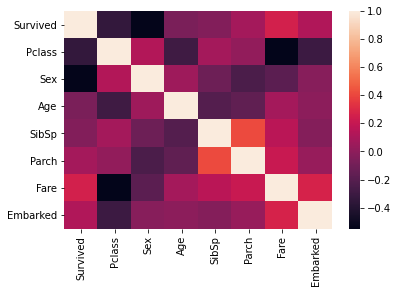

In [127]:
print(df_train.corr())
sns.heatmap(df_train.corr())

# Aplicación de algoritmos de ML

In [128]:
#Separamos la columna con la información de los sobrevivientes
X = np.array(df_train.drop(['Survived'], 1))
y = np.array(df_train['Survived'])

In [129]:
#Separamos los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [130]:
#Regresión logística
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, y_train))

Precisión Regresión Logística:
0.7837078651685393


In [131]:
#Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print('Precisión Soporte de Vectores:')
print(svc.score(X_train, y_train))

Precisión Soporte de Vectores:
0.6839887640449438


In [132]:
#K Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print('Precisión Vecinos más Cercanos:')
print(knn.score(X_train, y_train))

Precisión Vecinos más Cercanos:
0.8314606741573034


In [133]:
#Navie Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test) 
print('Precisión del modelo:')
print(precision_score(y_test, y_pred))

Precisión del modelo:
0.71875


# Predicción utilizando los modelos

In [134]:
ids = df_test['PassengerId']

In [135]:
#Regresión logística
prediccion_logreg = logreg.predict(df_test.drop('PassengerId', axis=1))
out_logreg = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_logreg })
print('Predicción Regresión Logística:')
out_logreg.head()

Predicción Regresión Logística:


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [136]:
#Support Vector Machines
prediccion_svc = svc.predict(df_test.drop('PassengerId', axis=1))
out_svc = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_svc })
print('Predicción Soporte de Vectores:')
out_svc.head()

Predicción Soporte de Vectores:


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [137]:
#K neighbors
prediccion_knn = knn.predict(df_test.drop('PassengerId', axis=1))
out_knn = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_knn })
print('Predicción Vecinos más Cercanos:')
out_knn.head()
out_knn.info()

Predicción Vecinos más Cercanos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [138]:
#Navie Bayes
prediccion_nb = nb.predict(df_test.drop('PassengerId', axis=1))
out_nb = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_nb})
print('Predicción Naives Bayes:')
out_nb.head()
out_nb.info()

#Matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Predicción Naives Bayes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
Matriz de Confusión:
[[95 18]
 [20 46]]


# Guardamos los datos del modelo Naives Bayes

In [139]:
out_nb.to_csv(r'C:\Users\maria\Documents\Kaggle\titanic\mySubmissions.csv', index = False)